## Overview

- Tetris game rule: https://tetris.wiki/Tetris_Guideline
- Deep Q-learning example, has code and some useful resources: https://github.com/nuno-faria/tetris-ai?tab=readme-ov-file
- Deep Q-learning example, has code: https://github.com/vietnh1009/Tetris-deep-Q-learning-pytorch
- Q-learning example, but simplified Tetris, has code and write-up: https://timhanewich.medium.com/how-i-trained-a-neural-network-to-play-tetris-using-reinforcement-learning-ecfa529c767a
- Q-learning paper, has pseudo-algo: https://openreview.net/pdf?id=8TLyqLGQ7Tg
- Deep Q Learning code mentioned in class: https://github.com/keon/deep-q-learning/blob/master/dqn.py

Roadmap:
1. ~~Develop human-playable Tetris~~
2. ~~Create an interface between the game and learning agent~~
3. ~~Try basic Tabular Q-Learning with a smaller board~~
4. Try feature-based state Tabular Q-learning
4. Deep Q-Network
5. Train the agent over many episodes
6. Evaluation, Visualization, Paper-writing




## Developing the Game

In [4]:
%load_ext autoreload
%autoreload 2

import TetrisGame
import time
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
"""Return mean micro-seconds per `(get_valid_actions + update_board)` step."""

steps = 1000
game = TetrisGame.TetrisGame()                       # relies on your new constructor

timings_ns = 0
for _ in range(steps):
    game.spawn_new_piece()
    t0 = time.perf_counter_ns()
    actions = game.get_valid_actions()
    if not actions:                              # game over – reset board
        game.reset_board()
        continue
    rot_idx, x = random.choice(actions)
    info = game.update_board(rot_idx, x)
    timings_ns += time.perf_counter_ns() - t0
    # skip rendering / line-clear data in `info`
    game.check_game_over()
    if game.game_over:
        game.reset_board()

print(timings_ns / steps / 1_000)  # µs per step


2532.0982999999997


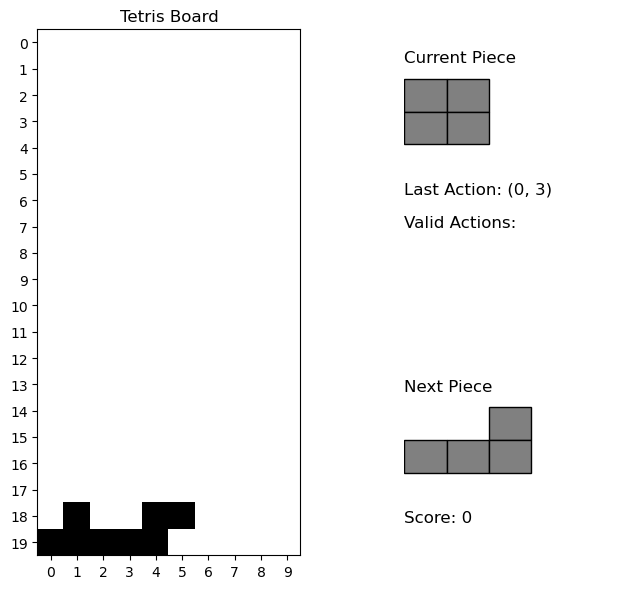

Final score: 0


In [17]:
game = TetrisGame.TetrisGame()
game.play()

In [39]:
game = TetrisGame.TetrisGame()

In [40]:
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
game.spawn_new_piece()          

In [42]:
game.current_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

In [43]:
game.next_piece

('L',
 [array([[0, 0, 1],
         [1, 1, 1]]),
  array([[1, 0],
         [1, 0],
         [1, 1]]),
  array([[1, 1, 1],
         [1, 0, 0]]),
  array([[1, 1],
         [0, 1],
         [0, 1]])])

In [45]:
valid = game.get_valid_actions()    
valid

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8)]

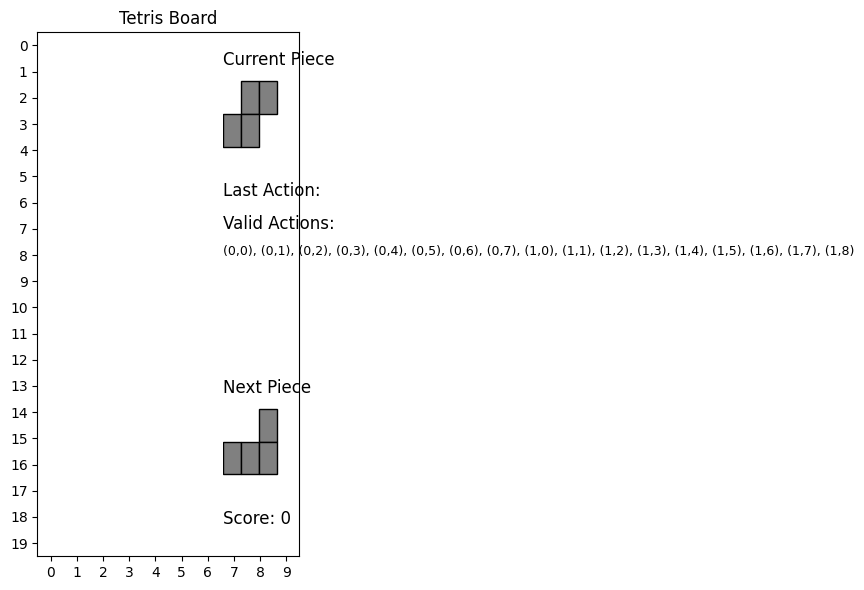

In [47]:
game.render(valid)

In [16]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
game.current_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

In [19]:
game.next_piece

('S',
 [array([[0, 1, 1],
         [1, 1, 0]]),
  array([[1, 0],
         [1, 1],
         [0, 1]])])

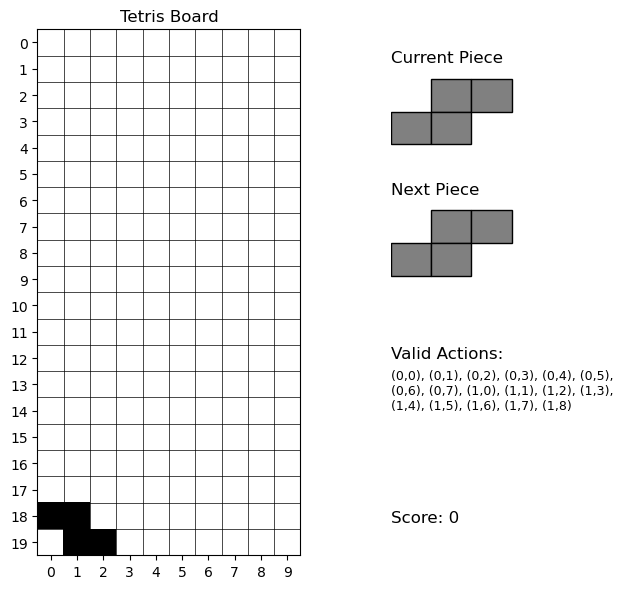

In [28]:
game.render(game.get_valid_actions())

In [29]:
game.player_input(game.get_valid_actions())

Not a valid pair; pick from the valid actions list.


(0, 0)

In [21]:
game.get_valid_actions()

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8)]

In [11]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [33]:
game.step(0, 0)
game.board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [35]:
print(game.game_over, game.score)

True 0


## Developing the Gym

In [50]:
%load_ext autoreload
%autoreload 2

import TetrisGame
import TetrisGym

import numpy as np
from collections import defaultdict
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
gym = TetrisGym.TetrisGym()

In [52]:
gym.game.current_piece

('Z',
 [array([[1, 1, 0],
         [0, 1, 1]]),
  array([[0, 1],
         [1, 1],
         [1, 0]])])

In [53]:
print(gym.state_mode)
gym.get_state()

flat


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.])

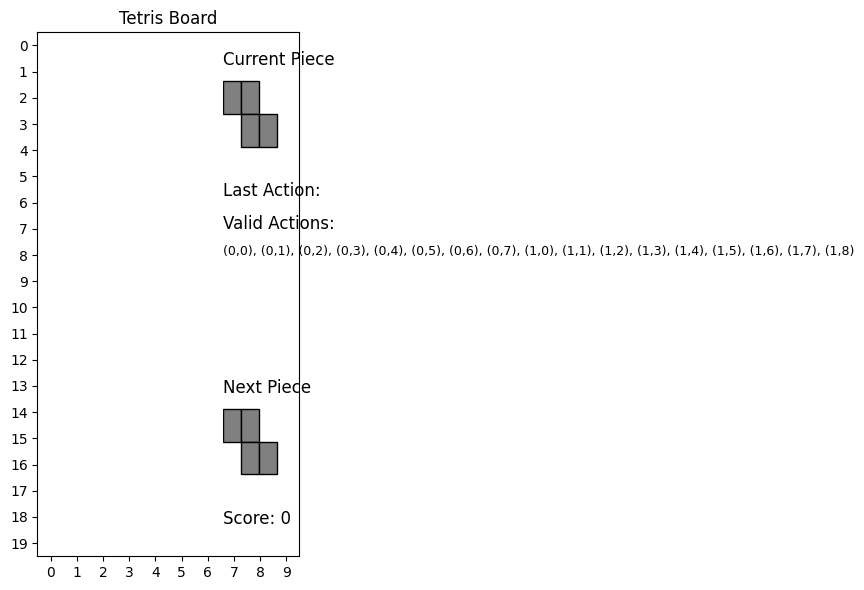

In [54]:
gym.render()

In [55]:
gym.get_valid_action_ids()

[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [56]:
"""
Rought draft of a Q-table learning
"""

env = TetrisGym.TetrisGym(max_steps=100)
epsilon = np.inf
Q   = defaultdict(lambda: np.zeros(env.get_action_space_size()))

for episode in range(1):
    state = env.reset()
    done  = False

    while not done:
        valid_ids = env.get_valid_action_ids()
        print(valid_ids)
        if np.random.rand() < epsilon:  # epsilon‑greedy over ONLY legal actions
            action_id = np.random.choice(valid_ids)
        else:
            q_vals    = Q[state][valid_ids]         # mask
            action_id = valid_ids[np.argmax(q_vals)]

        action_id = valid_ids[0]

        next_state, reward, done, _ = env.step(action_id)

        # Q‑update
        # best_next = np.max(Q[next_state]) if not done else 0
        # Q[state][action_id] += alpha * (reward + gamma * best_next - Q[state][action_id])

        state = next_state


[0, 1, 2, 3, 4, 5, 6, 17, 35]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
[0, 1, 2, 3, 4, 5, 6, 17, 7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34]


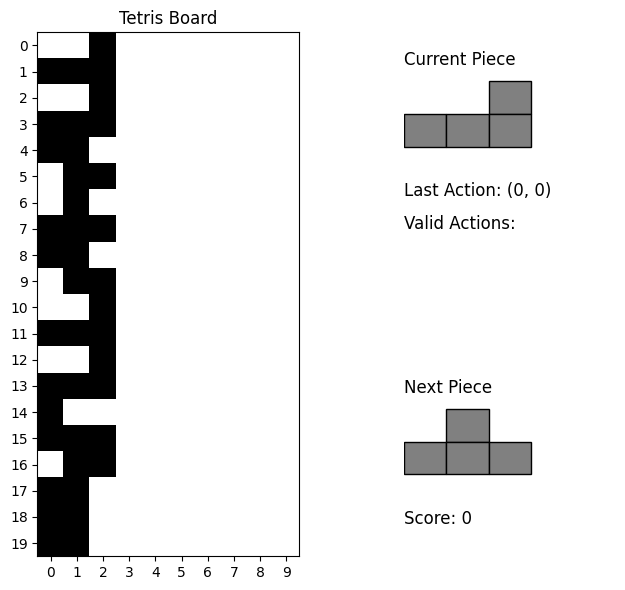

In [57]:
env.game.render(valid_actions=[])

In [58]:
gym = TetrisGym.TetrisGym(state_mode='tensor')
gym.get_state()[6]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
gym.game.current_piece

('T',
 [array([[0, 1, 0],
         [1, 1, 1]]),
  array([[1, 0],
         [1, 1],
         [1, 0]]),
  array([[1, 1, 1],
         [0, 1, 0]]),
  array([[0, 1],
         [1, 1],
         [0, 1]])])

## Developing Features

In [83]:
test_board = np.array(
    [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
     [0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
     [0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
     [0., 1., 1., 1., 0., 0., 1., 0., 0., 1.],
     [1., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
     [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [71]:
def _height_features(board):
    h, _ = board.shape
    mask = (board != 0)  # mask for filled cells
    filled_rows = np.argmax(mask, axis=0)  # first filled row per column, i.e. max height of each col
    empty_cols = ~np.any(mask, axis=0)
    filled_rows[empty_cols] = h  # if column empty, treat as full height from bottom

    col_heights = h - filled_rows  # vector of shape (w,)
    abs_height_diff = np.abs(np.diff(col_heights))
    print(col_heights)
    
    max_height = float(np.max(col_heights))
    min_height = float(np.min(col_heights))
    total_height = float(np.sum(col_heights))
    max_bumpiness = float(np.max(abs_height_diff))
    total_bumpiness = float(np.sum(abs_height_diff))
    return max_height, min_height, total_height, max_bumpiness, total_bumpiness

In [72]:
_height_features(test_board)

[2 5 3 3 1 1 1 1 1 6]


(6.0, 1.0, 24.0, 5.0, 12.0)

In [33]:
%timeit _max_height(test_board)

26.7 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [88]:
def count_holes(board: np.ndarray) -> int:
    """
    A hole is defined as an empty space such that there is at least one tile in the same column above it.
    board : np.ndarray of shape (H, W) with 1 = filled, 0 = empty
    """
    filled = board != 0                       # bool mask of filled cells
    # cumulative OR of 'filled' down each column
    accum_filled = np.maximum.accumulate(filled, axis=0)
    holes = (~filled) & accum_filled            # empty cells that have a block above
    return int(holes.sum())

In [90]:
count_holes(test_board)

4

In [89]:
%timeit count_holes(test_board)

9.17 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Tabular Q-learning

To do tabular Q-learning, we will have to maintain a Q-value for each state-action pair. But a standard Tetris Board has 10x20 rows, which amounts to **2^200** board configurations, even if not all of them are possible, it's still a lot. So we first go ahead and try out a smaller board.

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from TetrisGym import TetrisGym
from tabular_q import TabularQAgent

### Training (Start Fresh)

In [2]:
"""Q-learning parameters"""
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

ALPHA = 0.05  # learning rate
GAMMA = 0.5  # discount factor

EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.01  # minimum epsilon
EPSILON_DECAY = 0.99995

NUM_EPISODES = 1_000_000 #1_000_000
MAX_STEPS = 100

In [3]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = TabularQAgent(board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
                      alpha=ALPHA, gamma=GAMMA,
                      eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY)

In [4]:
agent.train(env, episodes=NUM_EPISODES, max_steps=100)

Tab-Q | mu_100=5.5 epsilon=0.01: 100%|██████████| 1000000/1000000 [1:13:11<00:00, 227.73it/s]


In [5]:
agent.save_agent(save_file="tabular_checkpoints/latest.pkl")

### Training (Start from agent)

In [6]:
"""Q-learning parameters"""
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

ALPHA = 0.05  # learning rate
GAMMA = 0.5  # discount factor

EPSILON = 1.0  # will be overwritten
EPSILON_MIN = 0.01  # minimum epsilon
EPSILON_DECAY = 0.99995

NUM_EPISODES = 10_000 #1_000_000
MAX_STEPS = 100

In [7]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = TabularQAgent(board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
                      alpha=ALPHA, gamma=GAMMA,
                      eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY)
agent.load_agent("tabular_checkpoints/latest.pkl")

In [8]:
agent.train(env, episodes=NUM_EPISODES, max_steps=100)

Tab-Q | mu_100=5.0 epsilon=0.37: 100%|██████████| 10000/10000 [00:46<00:00, 216.81it/s]


### Analysis

In [ ]:
with open("tabular_checkpoints/latest.pkl", "rb") as file:
    data = pickle.load(file)

rewards = data["rewards"]
scores = data['scores']

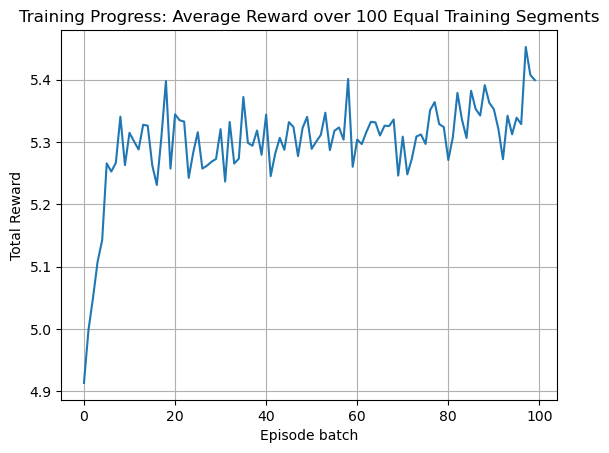

In [14]:
plt.plot(np.mean(np.array_split(rewards, 100),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

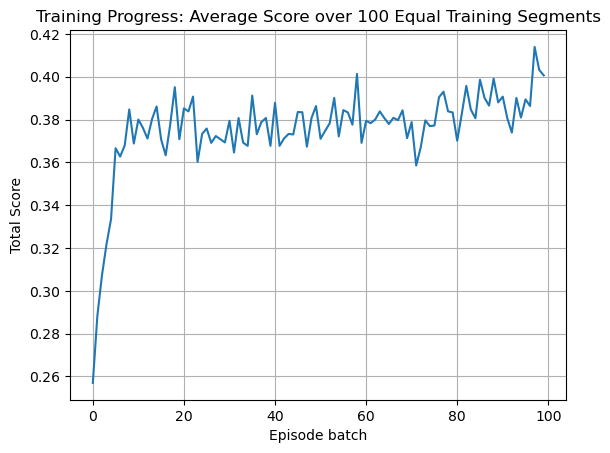

In [15]:
plt.plot(np.mean(np.array_split(scores, 100),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Score')
plt.title('Training Progress: Average Score over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [11]:
def evaluate_trained_policy(env, Q, num_episodes=1000):
    """Evaluate the policy with no exploration"""
    rewards = []
    for _ in tqdm(range(num_episodes), desc='Evaluating trained policy'):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            state_key = state.numpy().tobytes()
            valid_actions = env.get_valid_action_ids()
            if not valid_actions:
                break
            best_action = max(valid_actions, key=lambda a: Q[state_key][a])  # find action based on valid action and state
            state, reward, done, _ = env.step(best_action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

def evaluate_random_policy(env, num_episodes=1000):
    """A random agent for benchmark"""
    rewards = []
    for _ in tqdm(range(num_episodes), desc='Evaluating random policy'):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            valid_actions = env.get_valid_action_ids()
            if not valid_actions:
                break
            action = random.choice(valid_actions)
            state, reward, done, _ = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

In [12]:
env_trained = TetrisGym(width=6, height=6, state_mode='flat')
trained_Q = defaultdict(lambda: np.zeros(env_trained.get_action_space_size()), Q_table)  # defaultdict for agent access
greedy_rewards = evaluate_trained_policy(env_trained, trained_Q)

env_random = TetrisGym(width=6, height=6, state_mode='flat')
random_rewards = evaluate_random_policy(env_random)

Evaluating random policy: 100%|██████████| 1000/1000 [00:01<00:00, 952.80it/s]


In [13]:
def summarize_stats(name, rewards):
    rewards = np.array(rewards)
    print(f"{name} Agent:")
    print(f"  Mean reward:     {rewards.mean():.2f}")
    print(f"  Std deviation:   {rewards.std():.2f}")
    print(f"  Max reward:      {rewards.max()}")
    print(f"  Min reward:      {rewards.min()}")
    print()

summarize_stats("Greedy", greedy_rewards)
summarize_stats("Random", random_rewards)


Greedy Agent:
  Mean reward:     -7.36
  Std deviation:   2.85
  Max reward:      9.0
  Min reward:      -9.4

Random Agent:
  Mean reward:     -8.35
  Std deviation:   2.55
  Max reward:      10.2
  Min reward:      -9.600000000000001



In [18]:
"""Generates a gif of AI playing, also logs unvisted state"""

unexplored_states = set()
env_capture = TetrisGym(width=6, height=6, state_mode='flat', render_mode='capture')
trained_Q = defaultdict(lambda: np.zeros(env_capture.get_action_space_size()), Q_table)  # defaultdict for agent access
state_capture = env_capture.reset()
done = False
total_reward = 0
while not done:
    state_key = state_capture.numpy().tobytes()
    if state_key not in Q_table:
            unexplored_states.add(state_key)
    valid_actions = env_capture.get_valid_action_ids()
    if not valid_actions:
        break
    best_action = max(valid_actions, key=lambda a: trained_Q[state_key][a])  # find action based on valid action and state
    state_capture, reward, done, _ = env_capture.step(best_action)
    total_reward += reward
print("Total reward:", total_reward)
env_capture.save_gif("tetris_greedy.gif", fps=2)

Total reward: -6.800000000000001
GIF saved to tetris_greedy.gif


## Batch DQN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from TetrisGym import TetrisGym
from batch_dqn import DQNAgent

In [19]:
print("CUDA available:", torch.cuda.is_available())
print("Torch CUDA version:", torch.version.cuda)

CUDA available: True
Torch CUDA version: 12.6


### Training (Start fresh)

In [ ]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

# bellman update settings
ALPHA = 0.05  # learning rate
GAMMA = 0.5  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.01  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 1_000 #1_000_000
MAX_STEPS = 1_000

# Batch parameters
MEMORY_SIZE= 10_000  # size of memory to sample batches from
BATCH_SIZE = 128  # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 64  # episodes between target-net sync

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "batch_dqn_checkpoints/latest.pth"
GIF_CHECKPOINTS = {100, 500}  # which episode to save a gif

Using: cuda


In [23]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = DQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE, target_sync=TARGET_UPDATE_FREQ,
    device=DEVICE
)

In [24]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

DQN | mu_100=4.7 | epsilon=0.95: 100%|██████████| 1000/1000 [01:34<00:00, 10.62it/s]


In [43]:
agent.save_agent(SAVE_PATH)

### Training (Start from agent)

In [ ]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

# bellman update settings
ALPHA = 0.05  # learning rate
GAMMA = 0.5  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # will be updated when model is loaded
EPSILON_MIN = 0.01  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 1_000 #1_000_000
MAX_STEPS = 1_000

# Batch parameters
MEMORY_SIZE= 10_000  # size of memory to sample batches from
BATCH_SIZE = 128  # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 64  # episodes between target-net sync

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
LOAD_PATH = "batch_dqn_checkpoints/latest.pth"
SAVE_PATH = "batch_dqn_checkpoints/latest.pth"

Using: cuda


In [10]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = DQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE, target_sync=TARGET_UPDATE_FREQ,
    device=DEVICE
)
agent.load_agent(LOAD_PATH)

In [4]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

DQN | mu_100=4.7 | epsilon=0.01: 100%|██████████| 1000/1000 [01:02<00:00, 15.94it/s]


In [9]:
agent.save_agent(SAVE_PATH)

### Analysis

In [5]:
len(agent.rewards)

4000

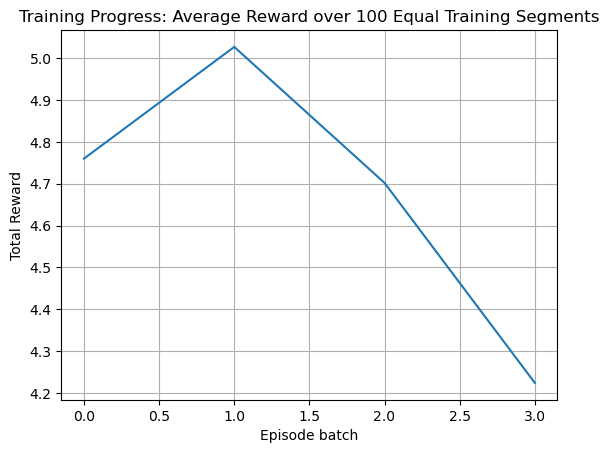

In [8]:
plt.plot(np.mean(np.array_split(agent.rewards, 4),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

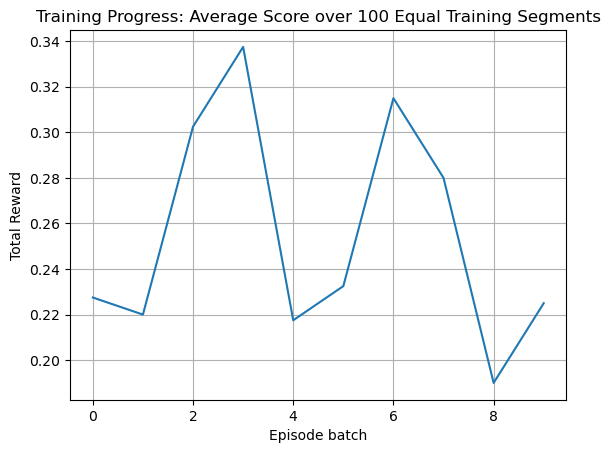

In [14]:
plt.plot(np.mean(np.array_split(agent.scores, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Score over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [13]:
agent.save_gif(save_path="batch_dqn_checkpoints/ep_4000.gif")

Saved gameplay GIF to: batch_dqn_checkpoints/ep_4000.gif


## Feature DQN (CNN)

In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch

from TetrisGym import TetrisGym
from feature_dqn import FeatureDQNAgent

In [2]:
print("CUDA available:", torch.cuda.is_available())
print("Torch CUDA version:", torch.version.cuda)

CUDA available: True
Torch CUDA version: 12.6


### Training (Start fresh)

In [3]:
""" Hyper‑parameters """
# Simulation settings
NUM_EPISODES = 10_000  # total training episodes
MAX_STEPS_PER_EPISODE = 1_000  # max step per game

# Bellman update settings
ALPHA = 0.001  # learning rate
GAMMA = 0.9  # discount rate

# Epsilon-greedy settings
EPSILON = 1.0  # starting epsilon for epsilon-greedy
EPSILON_MIN = 0.01
EPSILON_DECAY = 0.9999

# Batch parameters
BATCH_SIZE = 128  # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 64  # episodes between target-net sync

# Tetris Game environment settings (default is 20x10)
BOARD_WIDTH = 6
BOARD_HEIGHT = 6

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_DIR = "feature_dqn_checkpoints/"  # where to save gif and model checkpoints
GIF_CHECKPOINTS = {100, 1000}  # which episode to save a gif

Using: cuda


In [4]:
""" Environment & Agent """
env = TetrisGym(width=BOARD_WIDTH, height= BOARD_HEIGHT, state_mode="features", max_steps=MAX_STEPS_PER_EPISODE)

state = env.get_state()
state_shape = state[0].shape  # (c, h, w)
feature_dim = state[1].shape[0]  # f
num_actions = env.get_action_space_size()

agent = FeatureDQNAgent(state_shape=state_shape, num_actions=num_actions, feature_dim=feature_dim, device=DEVICE,
                 alpha=ALPHA, gamma=GAMMA,
                 epsilon=EPSILON, epsilon_min=EPSILON_MIN, epsilon_decay=EPSILON_DECAY)

In [5]:
def evaluate_and_save_gif(agent, episode_num, save_dir, board_width, board_height):
    """Run the (greedy) agent, capture one game, save GIF"""
    eval_env = TetrisGym(width=board_width, height=board_height, state_mode="features", render_mode="capture")

    old_eps = agent.epsilon 
    agent.epsilon = 0.0  # force greedy for eval, will reset afterwards

    state = eval_env.reset()
    done  = False
    while not done:
        valid_ids = eval_env.get_valid_action_ids()
        if not valid_ids:
            break
        action = agent.act(state, valid_ids)  # pick best action from existing agent
        state, _, done, _ = eval_env.step(action)

    agent.epsilon = old_eps  # restore

    gif_path = save_dir + f"ep_{episode_num}.gif"
    eval_env.save_gif(str(gif_path))

In [6]:
""" Training Loop """
episode_rewards = []
episode_score = []

progress_bar = tqdm(range(1, NUM_EPISODES+1), desc='Training agent | past 100 mean: 0.00 | epsilon: 0.00') 
for episode in progress_bar:
    state = env.reset()
    total_reward = 0.0
    done = False

    while not done:
        # Select action
        valid_ids = env.get_valid_action_ids()
        action_id = agent.act(state, valid_ids)

        next_state, reward, done, _ = env.step(action_id)  # Update environment
        agent.memorize(state, action_id, reward, next_state, done)  # Store transition

        loss = agent.replay(BATCH_SIZE)   # Train (replay), returns None until enough samples

        state = next_state  # move to next state after memorizing
        total_reward += reward  # update reward

    episode_rewards.append(total_reward)
    episode_score.append(env.game.score)

    if episode % TARGET_UPDATE_FREQ == 0:  # Target network hard update, after each TARGET_UPDATE_FREQ episodes
        agent.target_model.load_state_dict(agent.model.state_dict())

    if episode in GIF_CHECKPOINTS:  # Save GIF at checkpoints
        evaluate_and_save_gif(agent=agent, episode_num=episode, save_dir=SAVE_DIR,
                              board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT)

    # Checkpoint model every 1_000 episodes
    if episode % 1_000 == 0:
        extra = {
        "episode": episode,
        "episode_rewards": episode_rewards,
        "episode_score": episode_score
        }
        agent.save(SAVE_DIR + f"latest.pth", extra)

    # progress bar summary
    if episode % 100 == 0:
        recent = episode_rewards[-100:]
        mean_r = sum(recent) / len(recent)
        progress_bar.set_description(
        f'Training agent | Rolling reward : {mean_r:.2f} | epsilon: {agent.epsilon:.2f}'
        )


GIF saved to feature_dqn_checkpoints/ep_1000.gif


Training agent | Rolling reward : -27.69 | epsilon: 0.02: 100%|██████████| 10000/10000 [20:50<00:00,  8.00it/s] 


### Analysis

In [7]:
len(episode_score)

10000

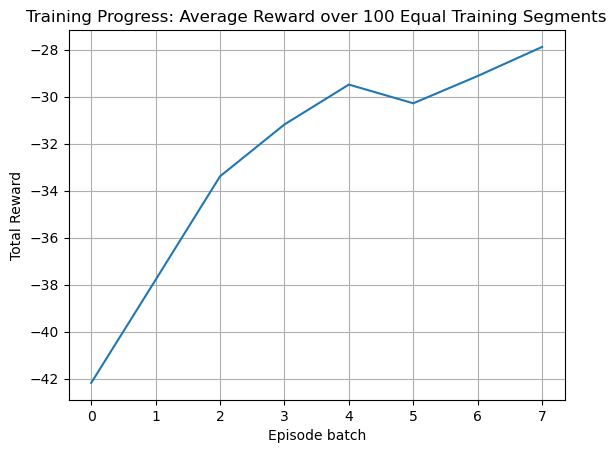

In [8]:
plt.plot(np.mean(np.array_split(episode_rewards, 8),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

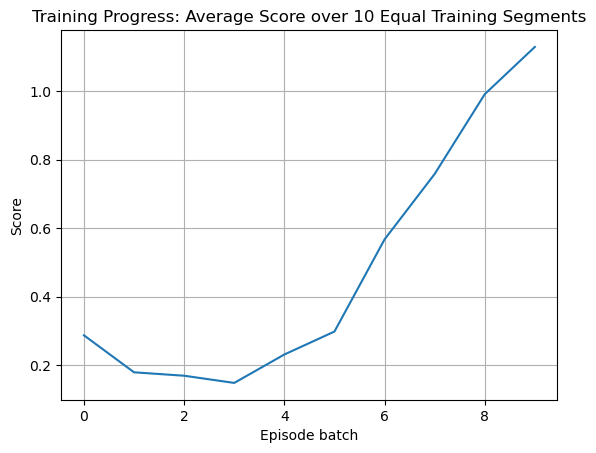

In [9]:
plt.plot(np.mean(np.array_split(episode_score, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Score')
plt.title('Training Progress: Average Score over 10 Equal Training Segments')
plt.grid(True)
plt.show()

## Feature DQN (MLP)

In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch

from TetrisGym import TetrisGym
from feature_mlp import FeatureMLPAgent

### Training (Start fresh)

In [2]:
""" Hyper‑parameters """
# Simulation settings
NUM_EPISODES = 5_000  # total training episodes
MAX_STEPS_PER_EPISODE = 1_000  # max step per game

# Bellman update settings
ALPHA = 0.001  # learning rate
GAMMA = 0.99  # discount rate

# Epsilon-greedy settings
EPSILON = 1.0  # starting epsilon for epsilon-greedy
EPSILON_MIN = 0.001
EPSILON_DECAY = 0.99

# Batch parameters
BATCH_SIZE = 512  # mini-batch size for replay(), used to perform a training update
TARGET_UPDATE_FREQ = 30  # episodes between target-net sync
GRAD_STEPS_PER_SYNC = 10_000  # steps before updating frozen model

# Tetris Game environment settings (default is 20x10)
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_DIR = "feature_mlp_checkpoints/"  # where to save gif and model checkpoints
GIF_CHECKPOINTS = {100, 1000, 2000, 3000, 4000, 5000}  # which episode to save a gif

Using: cuda


In [3]:
""" Environment & Agent """
env = TetrisGym(width=BOARD_WIDTH, height= BOARD_HEIGHT, state_mode="features", max_steps=MAX_STEPS_PER_EPISODE)

state = env.get_state()[1]
feature_dim = state.shape[0]  # f
num_actions = env.get_action_space_size()

agent = FeatureMLPAgent(num_actions=num_actions, feature_dim=feature_dim, device=DEVICE,
                 alpha=ALPHA, gamma=GAMMA,
                 epsilon=EPSILON, epsilon_min=EPSILON_MIN, epsilon_decay=EPSILON_DECAY)

In [4]:
def evaluate_and_save_gif(agent, episode_num, save_dir, board_width, board_height):
    """Run the (greedy) agent, capture one game, save GIF"""
    eval_env = TetrisGym(width=board_width, height=board_height, state_mode="features", render_mode="capture")

    old_eps = agent.epsilon 
    agent.epsilon = 0.0  # force greedy for eval, will reset afterwards

    state = eval_env.reset()
    done  = False
    while not done:
        valid_ids = eval_env.get_valid_action_ids()
        if not valid_ids:
            break
        action = agent.act(state, valid_ids)  # pick best action from existing agent
        state, _, done, _ = eval_env.step(action)

    agent.epsilon = old_eps  # restore

    gif_path = save_dir + f"ep_{episode_num}.gif"
    eval_env.save_gif(str(gif_path))

In [5]:
""" Training Loop """
episode_rewards = []
episode_score = []
grad_steps = 0  # used for frozen model update

progress_bar = tqdm(range(1, NUM_EPISODES+1),
                    desc='Training agent | Rolling reward : 0.00 | Rolling score : 0.00 | epsilon: 0.00'
                    ) 
for episode in progress_bar:
    state = env.reset()
    total_reward = 0.0
    done = False

    while not done:
        # Select action
        valid_ids = env.get_valid_action_ids()
        action_id = agent.act(state, valid_ids)

        next_state, reward, done, _ = env.step(action_id)  # Update environment
        next_valid = env.get_valid_action_ids()
        agent.memorize(state, action_id, reward, next_state, done, next_valid)  # Store transition

        loss = agent.replay(BATCH_SIZE)   # Train (replay), returns None until enough samples
        if loss is not None:
            grad_steps += 1
            if grad_steps % GRAD_STEPS_PER_SYNC == 0:
                agent.target_model.load_state_dict(agent.model.state_dict())

        state = next_state  # move to next state after memorizing
        total_reward += reward  # update reward

    agent.update_epsilon()
    episode_rewards.append(total_reward)
    episode_score.append(env.game.score)

    # if episode % TARGET_UPDATE_FREQ == 0:  # Target network hard update, after each TARGET_UPDATE_FREQ episodes
    #     agent.target_model.load_state_dict(agent.model.state_dict())

    if episode in GIF_CHECKPOINTS:  # Save GIF at checkpoints
        evaluate_and_save_gif(agent=agent, episode_num=episode, save_dir=SAVE_DIR,
                              board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT)

    # Checkpoint model every 1_000 episodes
    if episode % 1_000 == 0:
        extra = {
        "episode": episode,
        "episode_rewards": episode_rewards,
        "episode_score": episode_score
        }
        agent.save(SAVE_DIR + f"latest.pth", extra)

    # progress bar summary
    recent_reward = episode_rewards[-min(len(episode_rewards),100):]
    mean_r = sum(recent_reward) / len(recent_reward)
    recent_score = episode_score[-min(len(episode_score),100):]
    mean_s = sum(recent_score) / len(recent_score)
    progress_bar.set_description(
    f'Training agent | Rolling reward : {mean_r:.2f} | Rolling score : {mean_s:.2f} | epsilon: {agent.epsilon:.2f}'
    )


GIF saved to feature_mlp_checkpoints/ep_5000.gif


Training agent | Rolling reward : 19.49 | Rolling score : 0.02 | epsilon: 0.00: 100%|██████████| 5000/5000 [30:18<00:00,  2.75it/s]


### Analysis

In [6]:
len(episode_score)

5000

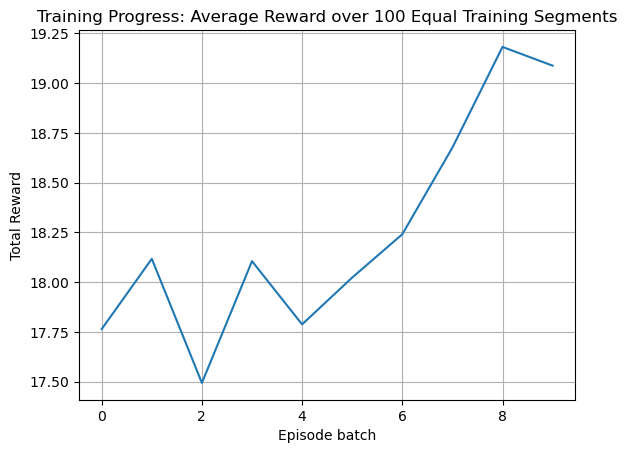

In [7]:
plt.plot(np.mean(np.array_split(episode_rewards[:1700], 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

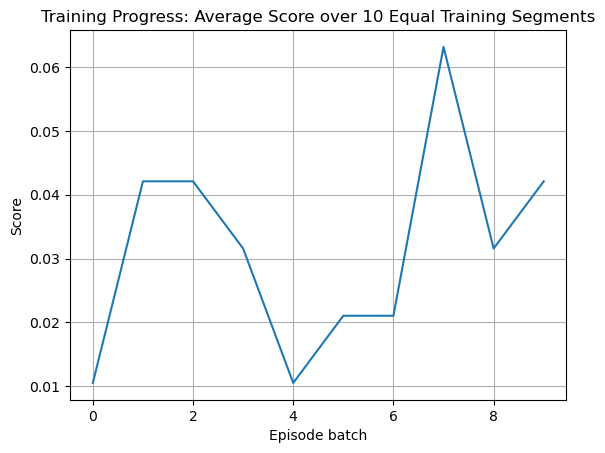

In [8]:
plt.plot(np.mean(np.array_split(episode_score[:1900], 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Score')
plt.title('Training Progress: Average Score over 10 Equal Training Segments')
plt.grid(True)
plt.show()

In [10]:
evaluate_and_save_gif(agent=agent, episode_num=episode, save_dir=SAVE_DIR,
                              board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT)

GIF saved to feature_mlp_checkpoints/ep_4000.gif
